### 1. Data loading

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = r'D:\1.UofM\2024 Fall\FDS\Project\medical-appointments-no-show-en.csv'
data = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)
display(data.head())
display(data.info())
display(data.describe())

,specialty,appointment_time,gender,appointment_date,no_show,no_show_reason,disability,date_of_birth,entry_service_date,city,icd,appointment_month,appointment_year,appointment_shift,age,under_12_years_old,over_60_years_old,patient_needs_companion,average_temp_day,average_rain_day,max_temp_day,max_rain_day,rainy_day_before,storm_day_before,rain_intensity,heat_intensity
0,physiotherapy,13:20,M,09-09-2021,yes,surto,NaN,NaN,NaN,NaN,NaN,sept,2021,afternoon,NaN,0,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
1,psychotherapy,13:20,M,09-09-2021,no,NaN,NaN,NaN,NaN,NaN,NaN,sept,2021,afternoon,NaN,0,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
2,speech therapy,13:20,F,09-09-2021,no,NaN,NaN,NaN,NaN,NaN,NaN,sept,2021,afternoon,NaN,0,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
3,physiotherapy,13:20,F,09-09-2021,no,NaN,NaN,NaN,NaN,NaN,NaN,sept,2021,afternoon,NaN,0,0,0,20.75,0.01,23.7,0.2,1,1,no_rain,mild
4,physiotherapy,14:00,M,09-09-2021,no,NaN,motor,10-10-1954,05-02-2020,B. CAMBORIU,I67,sept,2021,afternoon,68.0,0,1,1,20.75,0.01,23.7,0.2,1,1,no_rain,mild


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49593 entries, 0 to 49592
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   specialty                42139 non-null  object 
 1   appointment_time         49593 non-null  object 
 2   gender                   49593 non-null  object 
 3   appointment_date         49593 non-null  object 
 4   no_show                  49593 non-null  object 
 5   no_show_reason           1737 non-null   object 
 6   disability               44456 non-null  object 
 7   date_of_birth            39272 non-null  object 
 8   entry_service_date       44438 non-null  object 
 9   city                     44412 non-null  object 
 10  icd                      10717 non-null  object 
 11  appointment_month        49593 non-null  object 
 12  appointment_year         49593 non-null  int64  
 13  appointment_shift        49593 non-null  object 
 14  age                   

None

,appointment_year,age,under_12_years_old,over_60_years_old,patient_needs_companion,average_temp_day,average_rain_day,max_temp_day,max_rain_day,rainy_day_before,storm_day_before
count,49593.000000,39243.000000,49593.000000,49593.000000,49593.000000,48577.000000,48577.000000,48577.000000,48577.000000,49593.000000,49593.000000
mean,2018.255076,18.522361,0.472446,0.071784,0.544230,19.748317,0.190119,23.961984,1.895687,0.981005,0.981005
std,1.736964,19.234999,0.499245,0.258133,0.498045,3.428767,0.452214,3.819804,4.445412,0.136507,0.136507
min,2016.000000,2.000000,0.000000,0.000000,0.000000,8.940000,0.000000,13.300000,0.000000,0.000000,0.000000
25%,2017.000000,8.000000,0.000000,0.000000,0.000000,17.480000,0.000000,21.400000,0.000000,1.000000,1.000000
50%,2018.000000,11.000000,0.000000,0.000000,1.000000,20.060000,0.010000,23.900000,0.200000,1.000000,1.000000
75%,2019.000000,15.000000,1.000000,0.000000,1.000000,22.120000,0.150000,26.500000,1.600000,1.000000,1.000000
max,2022.000000,110.000000,1.000000,1.000000,1.000000,28.010000,4.770000,35.400000,45.000000,1.000000,1.000000


In [3]:
data.isna().sum()

specialty                   7454
appointment_time               0
gender                         0
appointment_date               0
no_show                        0
no_show_reason             47856
disability                  5137
date_of_birth              10321
entry_service_date          5155
city                        5181
icd                        38876
appointment_month              0
appointment_year               0
appointment_shift              0
age                        10350
under_12_years_old             0
over_60_years_old              0
patient_needs_companion        0
average_temp_day            1016
average_rain_day            1016
max_temp_day                1016
max_rain_day                1016
rainy_day_before               0
storm_day_before               0
rain_intensity                 0
heat_intensity                 0
dtype: int64

## 2. Data Preprocessing

In [4]:
# cleaning 'specialty' column

data['specialty'].info(), data['specialty'].head()
# Fill missing values in 'specialty' with the mode
data['specialty'].fillna(data['specialty'].mode()[0], inplace=True)
data['specialty'].isnull().sum() #verifying

<class 'pandas.core.series.Series'>
RangeIndex: 49593 entries, 0 to 49592
Series name: specialty
Non-Null Count  Dtype 
--------------  ----- 
42139 non-null  object
dtypes: object(1)
memory usage: 387.6+ KB


np.int64(0)

In [5]:
# cleaning 'appointment_time' column
data['appointment_time'] = pd.to_datetime(data['appointment_time'], format='%H:%M', errors='coerce')
# Replace the 'appointment_time' values with 'morning' or 'afternoon'
data['appointment_time'] = data['appointment_time'].apply(lambda x: 'morning' if x.hour < 12 else 'afternoon')
data['appointment_time'].head()

0    afternoon
1    afternoon
2    afternoon
3    afternoon
4    afternoon
Name: appointment_time, dtype: object

In [6]:
# cleaning 'gender' column
data['gender'] = data['gender'].map({'M': 0, 'F': 1}) # mapping the M to 0 and F to 1 
data['gender'].fillna(0, inplace=True)  
data['gender'] = data['gender'].astype(int) #verify datatype
data['gender'].head() 

0    0
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

In [7]:
# cleaning 'appointment_date' column
data['appointment_date'] = pd.to_datetime(data['appointment_date'], format='%d-%m-%Y', errors='coerce')
# Extract day of the week and month of the year
data['appointment_day_of_week'] = data['appointment_date'].dt.dayofweek  # Monday=0, Sunday=6
data['appointment_month_of_year'] = data['appointment_date'].dt.month    # January=1, December=12
print(data[['appointment_date', 'appointment_day_of_week', 'appointment_month_of_year']].head())

  appointment_date  appointment_day_of_week  appointment_month_of_year
0       2021-09-09                        3                          9
1       2021-09-09                        3                          9
2       2021-09-09                        3                          9
3       2021-09-09                        3                          9
4       2021-09-09                        3                          9


In [8]:
# cleaning 'no_show' column
# Map 'no_show' to binary encoding:'no' to 0, 'yes' to 1
data['no_show'] = data['no_show'].map({'no': 0, 'yes': 1}).astype(int)
data['no_show'].head()

0    1
1    0
2    0
3    0
4    0
Name: no_show, dtype: int64

In [9]:
# Dropping the 'no_show_reason' column as it has large no of missing columns
data.drop(columns=['no_show_reason'], inplace=True)

In [10]:
# Displaying unique values and their counts in the 'disability' column
print("Unique values in 'disability' column with counts:")
print(data['disability'].value_counts(dropna=False))

Unique values in 'disability' column with counts:
disability
intellectual    30882
motor           13565
NaN              5137
                    9
Name: count, dtype: int64


In [11]:
# cleaning 'disability' column
data['disability'] = data['disability'].apply(lambda x: 1 if x in ['intellectual', 'motor'] else 0)
data['disability'] = data['disability'].astype(int)
data['disability'].head()

0    0
1    0
2    0
3    0
4    1
Name: disability, dtype: int64

In [12]:
# Count missing values in 'age' and 'date_of_birth' columns
missing_age = data['age'].isna().sum()
missing_date_of_birth = data['date_of_birth'].isna().sum()

print(f"Missing values in 'age': {missing_age}")
print(f"Missing values in 'date_of_birth': {missing_date_of_birth}")


Missing values in 'age': 10350
Missing values in 'date_of_birth': 10321


In [13]:
# cleaning 'date of birth' columns
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'], format='%d-%m-%Y', errors='coerce')
# Calculating age based on 'date_of_birth' and 'appointment_date' for missing values in 'age'
data.loc[data['age'].isna(), 'age'] = (data['appointment_date'] - data['date_of_birth']).dt.days // 365
missing_age_after = data['age'].isna().sum()
print(f"Remaining missing values in 'age' after filling: {missing_age_after}")

Remaining missing values in 'age' after filling: 10350


In [14]:
# cleaning 'age' columns and dropping date of birth
median_age = data['age'].median()
data['age'].fillna(median_age, inplace=True)
data['age'] = data['age'].astype(int)
data.drop(columns=['date_of_birth'], inplace=True)
print(f"Remaining missing values in 'age' after median imputation: {data['age'].isna().sum()}")
print(f"'age' column data type: {data['age'].dtype}")


Remaining missing values in 'age' after median imputation: 0
'age' column data type: int64


In [15]:
data['entry_service_date'] .isna().sum()

np.int64(5155)

In [16]:
# Dropping the 'entry_service_date' column
data.drop(columns=['entry_service_date'], inplace=True)
print(data.columns)

Index(['specialty', 'appointment_time', 'gender', 'appointment_date',
       'no_show', 'disability', 'city', 'icd', 'appointment_month',
       'appointment_year', 'appointment_shift', 'age', 'under_12_years_old',
       'over_60_years_old', 'patient_needs_companion', 'average_temp_day',
       'average_rain_day', 'max_temp_day', 'max_rain_day', 'rainy_day_before',
       'storm_day_before', 'rain_intensity', 'heat_intensity',
       'appointment_day_of_week', 'appointment_month_of_year'],
      dtype='object')


In [17]:
data['city'] .isna().sum()

np.int64(5181)

In [18]:
# cleaning 'city' column by filling 'unknown' inplace of missing values
data['city'].fillna('Unknown', inplace=True)
print(f"Remaining missing values in 'city': {data['city'].isna().sum()}")
data['city'].unique()

Remaining missing values in 'city': 0


array(['Unknown', 'B. CAMBORIU', 'ITAJAÍ', 'CAMBORIU', 'NAVEGANTES',
       'ILHOTA', 'BOMBINHAS', 'PORTO BELO', 'ITAPEMA', 'PENHA',
       'LUIZ ALVES', 'BALN. PIÇARRAS', 'MONTENEGRO', 'BLUMENAU'],
      dtype=object)

In [19]:
data['icd'] .isna().sum()

np.int64(38876)

In [20]:
# Filling missing values in 'icd' with 'Unknown'
data['icd'].fillna('Unknown', inplace=True)
print(f"Remaining missing values in 'icd': {data['icd'].isna().sum()}")
data['icd'].unique()

Remaining missing values in 'icd': 0


array(['Unknown', 'I67', 'F84.0', 'F83', 'T91.3', 'G91.ES06', 'F84',
       'R68', 'F84.EF91', 'F80.8EF84', 'I69.4', 'G11', 'I64', 'S24',
       'R26', 'R13', 'Z00', 'G45.8', 'G37', 'G93.4', 'Q05.9', 'R47.1',
       'G45', 'F84.1', 'R68.0', 'F84.5', 'Q99.9EF84.0', 'F80.9', 'F71',
       'I69', 'G09', 'G20', 'F80', 'G81', 'Z00.1', 'G71.3', 'R61.0',
       'F90', 'R46.3', 'Q05.2', 'F83.0', 'S72.3', 'D43.4', 'F90./F06.7',
       'G81.1', 'G40', 'F68', 'G80.9/F84.9/G40.1', 'T00', 'K02', 'Z71.2',
       'S14', 'J06', 'P21', 'H90', 'F71.2', 'K68', 'G21.3', 'Z11.2',
       'G80.9', 'Z89.4/I73', 'R58', 'F84.,9', 'R62'], dtype=object)

In [21]:
# mapping for month names to numbers
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'april': 4, 'may': 5, 'june': 6, 
    'july': 7, 'aug': 8, 'sept': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
data['appointment_month'] = data['appointment_month'].str.lower().map(month_mapping)
data['appointment_month'].head()

0    9
1    9
2    9
3    9
4    9
Name: appointment_month, dtype: int64

In [22]:
# cleaning 'appointment_year' column
print(f"Data type of 'appointment_year': {data['appointment_year'].dtype}")
print(f"Missing values in 'appointment_year': {data['appointment_year'].isna().sum()}")

# Convert to integer if not already in that format
data['appointment_year'] = data['appointment_year'].astype(int)


Data type of 'appointment_year': int64
Missing values in 'appointment_year': 0


In [23]:
# Mapping 'morning' to 0 and 'afternoon' to 1 in 'appointment_shift'
data['appointment_shift'] = data['appointment_shift'].map({'morning': 0, 'afternoon': 1})
data['appointment_shift'].head()

0    1
1    1
2    1
3    1
4    1
Name: appointment_shift, dtype: int64

In [24]:
# Dropping 'appointment_time' column as it is now redundant
data.drop(columns=['appointment_time'], inplace=True)
data.columns

Index(['specialty', 'gender', 'appointment_date', 'no_show', 'disability',
       'city', 'icd', 'appointment_month', 'appointment_year',
       'appointment_shift', 'age', 'under_12_years_old', 'over_60_years_old',
       'patient_needs_companion', 'average_temp_day', 'average_rain_day',
       'max_temp_day', 'max_rain_day', 'rainy_day_before', 'storm_day_before',
       'rain_intensity', 'heat_intensity', 'appointment_day_of_week',
       'appointment_month_of_year'],
      dtype='object')

In [25]:
# Checking 'patient_needs_companion' column 
print(f"Missing values in 'patient_needs_companion': {data['patient_needs_companion'].isna().sum()}")
print("Unique values in 'patient_needs_companion':", data['patient_needs_companion'].unique())

Missing values in 'patient_needs_companion': 0
Unique values in 'patient_needs_companion': [0 1]


In [26]:
# Checking weather-related columns
missing_values = data[['average_temp_day', 'average_rain_day', 'max_temp_day', 'max_rain_day']].isna().sum()
print("Missing values in weather-related columns:\n", missing_values)
print("\nData types of weather-related columns:\n", data[['average_temp_day', 'average_rain_day', 'max_temp_day', 'max_rain_day']].dtypes)

Missing values in weather-related columns:
 average_temp_day    1016
average_rain_day    1016
max_temp_day        1016
max_rain_day        1016
dtype: int64

Data types of weather-related columns:
 average_temp_day    float64
average_rain_day    float64
max_temp_day        float64
max_rain_day        float64
dtype: object


In [27]:
# cleaning weather-related columns
data['average_temp_day'].fillna(data['average_temp_day'].mean(), inplace=True)
data['average_rain_day'].fillna(data['average_rain_day'].mean(), inplace=True)
data['max_temp_day'].fillna(data['max_temp_day'].mean(), inplace=True)
data['max_rain_day'].fillna(data['max_rain_day'].mean(), inplace=True)
missing_values_after = data[['average_temp_day', 'average_rain_day', 'max_temp_day', 'max_rain_day']].isna().sum()
print("Remaining missing values in weather-related columns after mean imputation:\n", missing_values_after)

Remaining missing values in weather-related columns after mean imputation:
 average_temp_day    0
average_rain_day    0
max_temp_day        0
max_rain_day        0
dtype: int64


In [28]:
# checking 'rainy_day_before' and 'storm_day_before'
missing_values = data[['rainy_day_before', 'storm_day_before']].isna().sum()
unique_values = {
    'rainy_day_before': data['rainy_day_before'].unique(),
    'storm_day_before': data['storm_day_before'].unique()
}
print("Missing values in binary weather columns:\n", missing_values)
print("\nUnique values in binary weather columns:\n", unique_values)


Missing values in binary weather columns:
 rainy_day_before    0
storm_day_before    0
dtype: int64

Unique values in binary weather columns:
 {'rainy_day_before': array([1, 0]), 'storm_day_before': array([1, 0])}


In [29]:
# Describing 'rain_intensity' and 'heat_intensity' columns in DataFrame
data[['rain_intensity', 'heat_intensity']].describe()


,rain_intensity,heat_intensity
count,49593,49593
unique,4,5
top,no_rain,mild
freq,35362,23413


In [30]:
unique_values = {col: data[col].unique() for col in ['rain_intensity', 'heat_intensity']}
unique_values

{'rain_intensity': array(['no_rain', 'moderate', 'weak', 'heavy'], dtype=object),
 'heat_intensity': array(['mild', 'cold', 'warm', 'heavy_cold', 'heavy_warm'], dtype=object)}

In [31]:
# mappings again for 'rain_intensity' and 'heat_intensity'
rain_intensity_mapping = {'no_rain': 0, 'weak': 1, 'moderate': 2, 'heavy': 3}
heat_intensity_mapping = {'cold': 0, 'mild': 1, 'warm': 2, 'heavy_cold': 3, 'heavy_warm': 4}
data['rain_intensity'] = data['rain_intensity'].map(rain_intensity_mapping)
data['heat_intensity'] = data['heat_intensity'].map(heat_intensity_mapping)
data['rain_intensity'].fillna(0, inplace=True)
data['heat_intensity'].fillna(0, inplace=True)
print(data[['rain_intensity', 'heat_intensity']].describe())
print("Unique values in 'rain_intensity':", data['rain_intensity'].unique())
print("Unique values in 'heat_intensity':", data['heat_intensity'].unique())


       rain_intensity  heat_intensity
count    49593.000000    49593.000000
mean         0.526365        1.002057
std          0.909231        0.836797
min          0.000000        0.000000
25%          0.000000        0.000000
50%          0.000000        1.000000
75%          1.000000        1.000000
max          3.000000        4.000000
Unique values in 'rain_intensity': [0 2 1 3]
Unique values in 'heat_intensity': [1 0 2 3 4]


In [32]:
data.drop(columns=['appointment_month_of_year'], inplace=True)

In [33]:
# finally checking for any missing values
data.isna().sum()

specialty                  0
gender                     0
appointment_date           0
no_show                    0
disability                 0
city                       0
icd                        0
appointment_month          0
appointment_year           0
appointment_shift          0
age                        0
under_12_years_old         0
over_60_years_old          0
patient_needs_companion    0
average_temp_day           0
average_rain_day           0
max_temp_day               0
max_rain_day               0
rainy_day_before           0
storm_day_before           0
rain_intensity             0
heat_intensity             0
appointment_day_of_week    0
dtype: int64

In [34]:
data.shape

(49593, 23)

In [35]:
# displaying final dataset after data preprocessing
pd.set_option('display.max_columns', None)
display(data.head())

,specialty,gender,appointment_date,no_show,disability,city,icd,appointment_month,appointment_year,appointment_shift,age,under_12_years_old,over_60_years_old,patient_needs_companion,average_temp_day,average_rain_day,max_temp_day,max_rain_day,rainy_day_before,storm_day_before,rain_intensity,heat_intensity,appointment_day_of_week
0,physiotherapy,0,2021-09-09,1,0,Unknown,Unknown,9,2021,1,11,0,0,0,20.75,0.01,23.7,0.2,1,1,0,1,3
1,psychotherapy,0,2021-09-09,0,0,Unknown,Unknown,9,2021,1,11,0,0,0,20.75,0.01,23.7,0.2,1,1,0,1,3
2,speech therapy,1,2021-09-09,0,0,Unknown,Unknown,9,2021,1,11,0,0,0,20.75,0.01,23.7,0.2,1,1,0,1,3
3,physiotherapy,1,2021-09-09,0,0,Unknown,Unknown,9,2021,1,11,0,0,0,20.75,0.01,23.7,0.2,1,1,0,1,3
4,physiotherapy,0,2021-09-09,0,1,B. CAMBORIU,I67,9,2021,1,68,0,1,1,20.75,0.01,23.7,0.2,1,1,0,1,3


#### Checking again all coulmns 

In [36]:
# remaining missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])
# Validating encodings 
categorical_columns = ['specialty', 'gender', 'disability', 'city', 'appointment_shift', 'rain_intensity', 'heat_intensity', 'no_show']
encoding_check = {col: data[col].dtype for col in categorical_columns}
print("\nData types of categorical columns (should all be integer types):\n", encoding_check)
print("\nData types of all columns:\n", data.dtypes)
unique_values = {col: data[col].unique() for col in categorical_columns}
print("\nUnique values in categorical columns:\n", unique_values)
# Sanity check for numerical columns (age and weather)
print("\nAge - min and max values:", data['age'].min(), "-", data['age'].max())
print("Average Temp Day - min and max values:", data['average_temp_day'].min(), "-", data['average_temp_day'].max())
print("Average Rain Day - min and max values:", data['average_rain_day'].min(), "-", data['average_rain_day'].max())
print("Max Temp Day - min and max values:", data['max_temp_day'].min(), "-", data['max_temp_day'].max())
print("Max Rain Day - min and max values:", data['max_rain_day'].min(), "-", data['max_rain_day'].max())


Missing values in each column:
 Series([], dtype: int64)

Data types of categorical columns (should all be integer types):
 {'specialty': dtype('O'), 'gender': dtype('int64'), 'disability': dtype('int64'), 'city': dtype('O'), 'appointment_shift': dtype('int64'), 'rain_intensity': dtype('int64'), 'heat_intensity': dtype('int64'), 'no_show': dtype('int64')}

Data types of all columns:
 specialty                          object
gender                              int64
appointment_date           datetime64[ns]
no_show                             int64
disability                          int64
city                               object
icd                                object
appointment_month                   int64
appointment_year                    int64
appointment_shift                   int64
age                                 int64
under_12_years_old                  int64
over_60_years_old                   int64
patient_needs_companion             int64
average_temp_day         

In [37]:
# Checking unique values in each encoded categorical column
encoded_columns = ['gender', 'disability', 'no_show', 'specialty', 'city', 'appointment_shift', 'rain_intensity', 'heat_intensity']
encoded_values = {col: data[col].unique() for col in encoded_columns}
print("Unique values in encoded columns:")
for col, values in encoded_values.items():
    print(f"{col}: {values}")
print("\nSample of Encoded Data:")
display(data[encoded_columns].head())


Unique values in encoded columns:
gender: [0 1]
disability: [0 1]
no_show: [1 0]
specialty: ['physiotherapy' 'psychotherapy' 'speech therapy' 'occupational therapy'
 'enf' 'assist' 'pedagogo' 'sem especialidade']
city: ['Unknown' 'B. CAMBORIU' 'ITAJAÍ' 'CAMBORIU' 'NAVEGANTES' 'ILHOTA'
 'BOMBINHAS' 'PORTO BELO' 'ITAPEMA' 'PENHA' 'LUIZ ALVES' 'BALN. PIÇARRAS'
 'MONTENEGRO' 'BLUMENAU']
appointment_shift: [1 0]
rain_intensity: [0 2 1 3]
heat_intensity: [1 0 2 3 4]

Sample of Encoded Data:


,gender,disability,no_show,specialty,city,appointment_shift,rain_intensity,heat_intensity
0,0,0,1,physiotherapy,Unknown,1,0,1
1,0,0,0,psychotherapy,Unknown,1,0,1
2,1,0,0,speech therapy,Unknown,1,0,1
3,1,0,0,physiotherapy,Unknown,1,0,1
4,0,1,0,physiotherapy,B. CAMBORIU,1,0,1


## 3. EDA

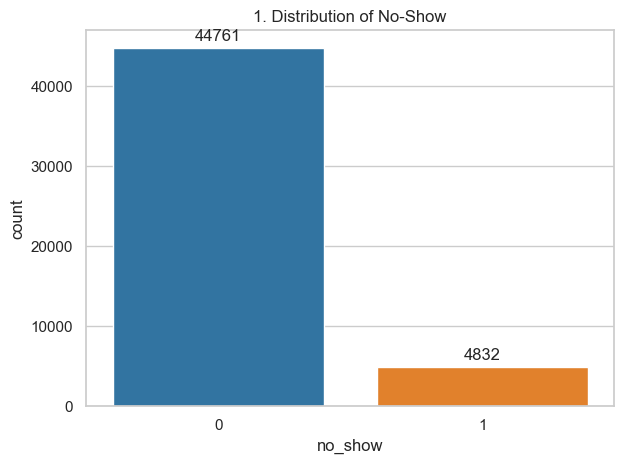

In [38]:
import seaborn as sns

# Set up Seaborn style
sns.set(style="whitegrid")

# Plotting the distribution of No-Show with custom colors for each bar
ax = sns.countplot(x='no_show', data=data, palette=['#1f77b4', '#ff7f0e'])
ax.set_title("1. Distribution of No-Show")
for p in ax.containers:
    ax.bar_label(p, label_type='edge', padding=3)  
ax.figure.tight_layout() 

[Text(0.5, 1.0, '2.No-Show Rate by Age Group'),
 Text(0.5, 0, 'Age Group'),
 Text(0, 0.5, 'No-Show Rate')]

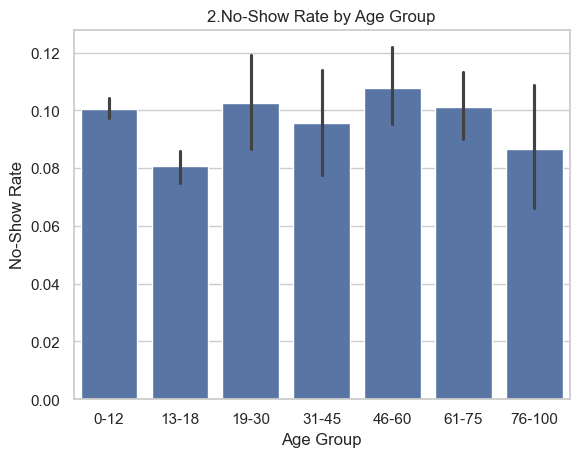

In [39]:
data['age_group'] = pd.cut(data['age'], bins=[0, 12, 18, 30, 45, 60, 75, 100], 
                           labels=['0-12', '13-18', '19-30', '31-45', '46-60', '61-75', '76-100'])

# Plotting no-show rate by age group
sns.barplot(x='age_group', y='no_show', data=data, estimator=lambda x: sum(x)/len(x)).set(
    title="2.No-Show Rate by Age Group", xlabel="Age Group", ylabel="No-Show Rate")


[Text(0.5, 1.0, '3.No-Show Rate by Gender'),
 Text(0.5, 0, 'Gender (0=Male, 1=Female)'),
 Text(0, 0.5, 'No-Show Rate')]

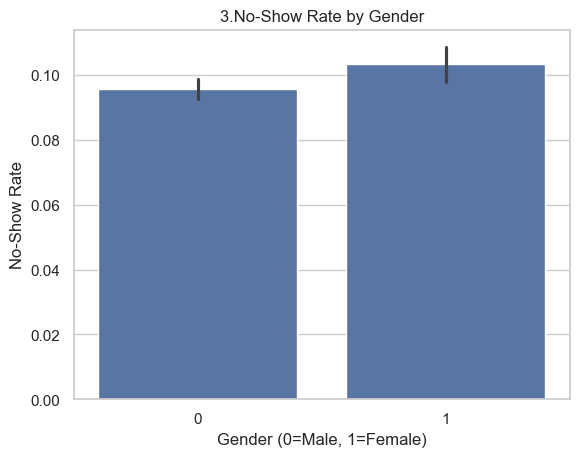

In [40]:
# Plotting no-show rate by gender
sns.barplot(x='gender', y='no_show', data=data, estimator=lambda x: sum(x)/len(x)).set(
    title="3.No-Show Rate by Gender", xlabel="Gender (0=Male, 1=Female)", ylabel="No-Show Rate")


[Text(0.5, 1.0, '4.No-Show Rate by Disability Status'),
 Text(0.5, 0, 'Disability (0=No, 1=Yes)'),
 Text(0, 0.5, 'No-Show Rate')]

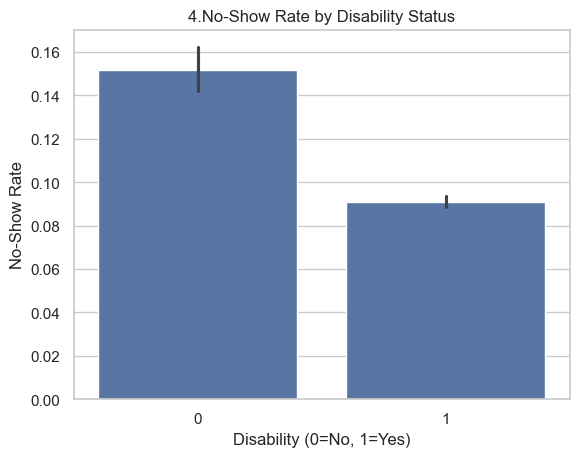

In [41]:
# Plotting no-show rate by disability status
sns.barplot(x='disability', y='no_show', data=data, estimator=lambda x: sum(x)/len(x)).set(
    title="4.No-Show Rate by Disability Status", xlabel="Disability (0=No, 1=Yes)", ylabel="No-Show Rate")

[Text(0.5, 1.0, '5.No-Show Rate by Appointment Shift'),
 Text(0.5, 0, 'Appointment Shift (0=Morning, 1=Afternoon)'),
 Text(0, 0.5, 'No-Show Rate')]

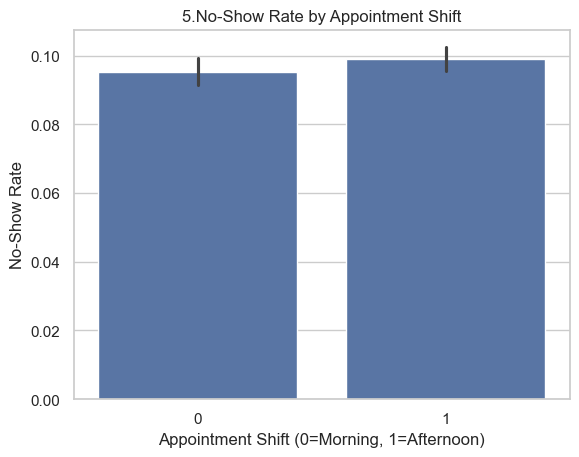

In [42]:
# Plotting no-show rate by appointment shift
sns.barplot(x='appointment_shift', y='no_show', data=data, estimator=lambda x: sum(x)/len(x)).set(
    title="5.No-Show Rate by Appointment Shift", xlabel="Appointment Shift (0=Morning, 1=Afternoon)", ylabel="No-Show Rate")


[Text(0.5, 1.0, '6.No-Show Rate by Average Temperature'),
 Text(0.5, 0, 'Average Temperature (°C)'),
 Text(0, 0.5, 'No-Show Rate')]

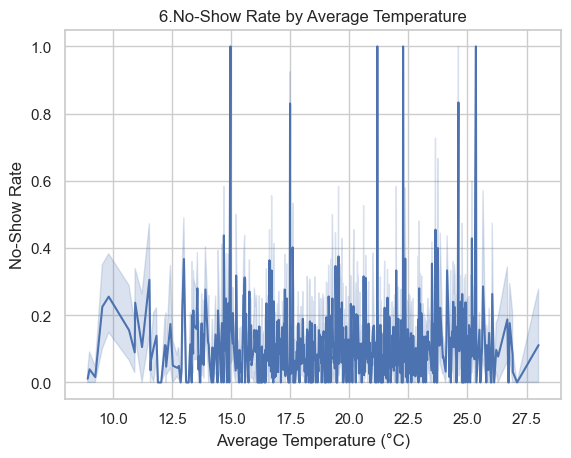

In [43]:
# Plotting no-show rate by average temperature
sns.lineplot(x='average_temp_day', y='no_show', data=data, estimator=lambda x: sum(x)/len(x)).set(
    title="6.No-Show Rate by Average Temperature", xlabel="Average Temperature (°C)", ylabel="No-Show Rate")


[Text(0.5, 1.0, '7.No-Show Rate by Rain Intensity'),
 Text(0.5, 0, 'Rain Intensity (0=No Rain, 1=Light, 2=Moderate, 3=Heavy)'),
 Text(0, 0.5, 'No-Show Rate')]

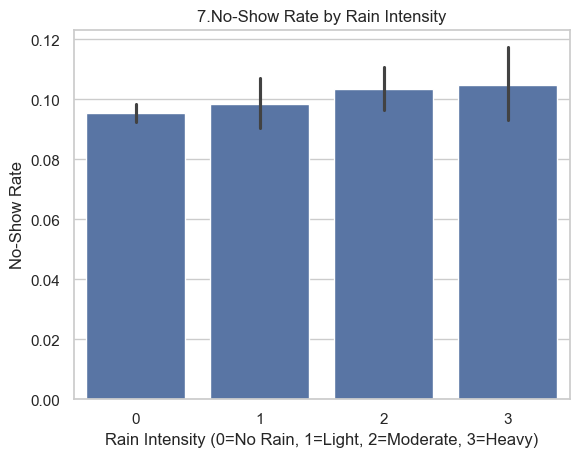

In [44]:
# Plotting no-show rate by rain intensity
sns.barplot(x='rain_intensity', y='no_show', data=data, estimator=lambda x: sum(x)/len(x)).set(
    title="7.No-Show Rate by Rain Intensity", xlabel="Rain Intensity (0=No Rain, 1=Light, 2=Moderate, 3=Heavy)", ylabel="No-Show Rate")


[Text(0.5, 1.0, '8. No-Show Rate by Appointment Month'),
 Text(0.5, 0, 'Appointment Month'),
 Text(0, 0.5, 'No-Show Rate')]

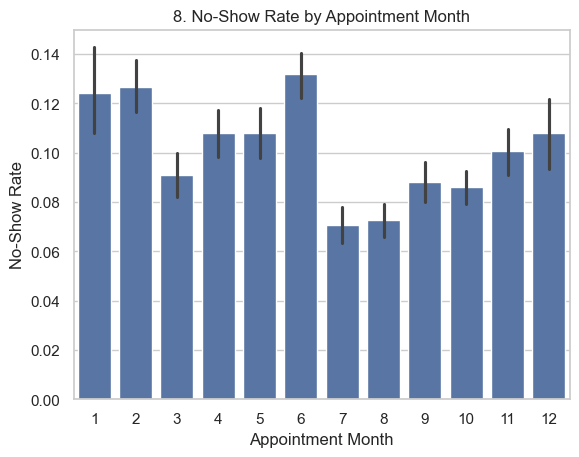

In [45]:
# Plotting no-show rate by appointment month
sns.barplot(x='appointment_month', y='no_show', data=data, estimator=lambda x: sum(x)/len(x)).set(
    title="8. No-Show Rate by Appointment Month", xlabel="Appointment Month", ylabel="No-Show Rate")


[Text(0.5, 1.0, '9.No-Show Rate by Patient Companion Requirement'),
 Text(0.5, 0, 'Patient Needs Companion (0=No, 1=Yes)'),
 Text(0, 0.5, 'No-Show Rate')]

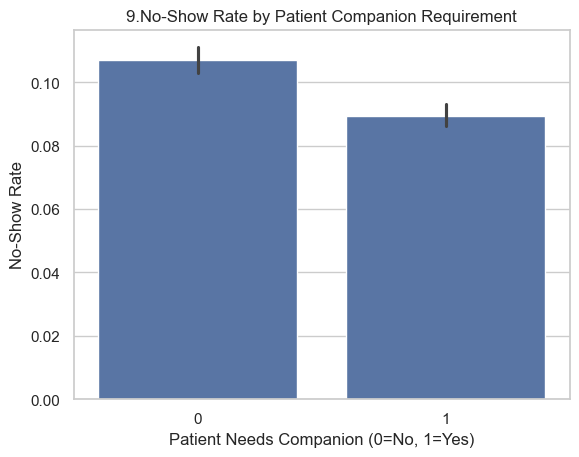

In [46]:
# Plotting no-show rate by patient companion requirement
sns.barplot(x='patient_needs_companion', y='no_show', data=data, estimator=lambda x: sum(x)/len(x)).set(
    title="9.No-Show Rate by Patient Companion Requirement", xlabel="Patient Needs Companion (0=No, 1=Yes)", ylabel="No-Show Rate")


[Text(0.5, 1.0, '11.No-Show Rate by Age Group and Appointment Shift'),
 Text(0.5, 0, 'Age Group'),
 Text(0, 0.5, 'No-Show Rate')]

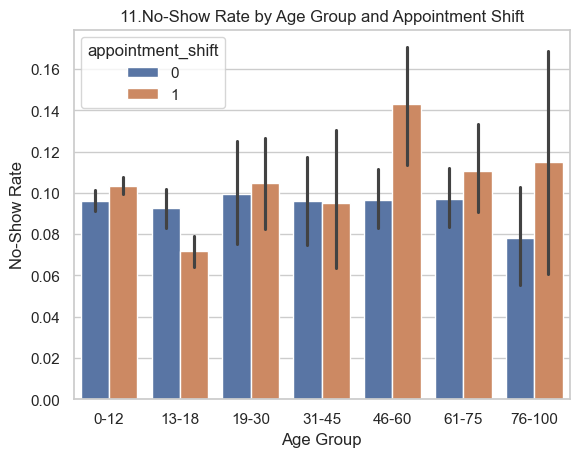

In [47]:
# Creating a bar plot to examine interaction between age group and appointment shift
sns.barplot(x='age_group', y='no_show', hue='appointment_shift', data=data, estimator=lambda x: sum(x)/len(x)).set(
    title="11.No-Show Rate by Age Group and Appointment Shift", xlabel="Age Group", ylabel="No-Show Rate")


#### visualization to answer questions from project planning

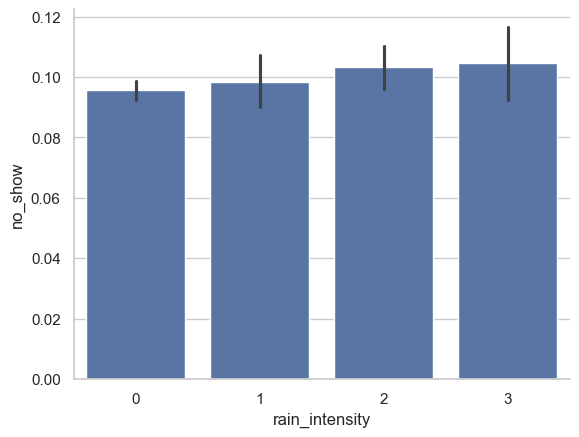

In [48]:
# Visualize the relationship between rain intensity and no-show rate
sns.barplot(x='rain_intensity', y='no_show', data=data)
sns.despine()

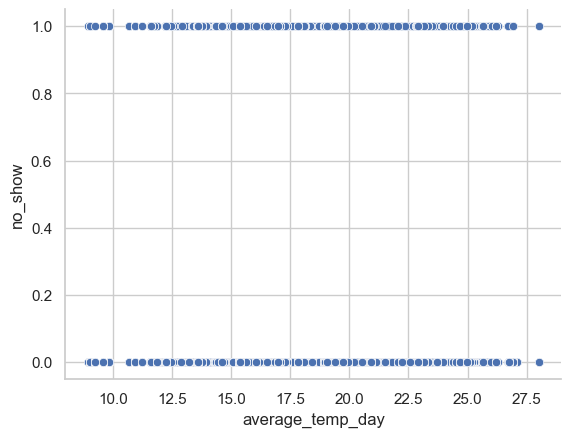

In [49]:
# Visualize the relationship between temperature and no-show rate
sns.scatterplot(x='average_temp_day', y='no_show', data=data)
sns.despine()

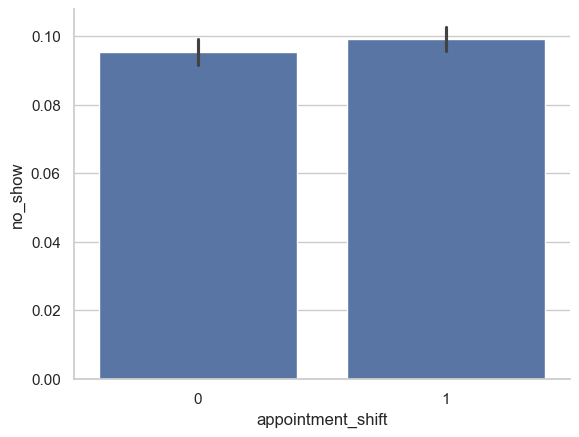

In [50]:
# Do certain appointment times (morning vs. afternoon) have higher no-show rates?
sns.barplot(x='appointment_shift', y='no_show', data=data)
sns.despine()


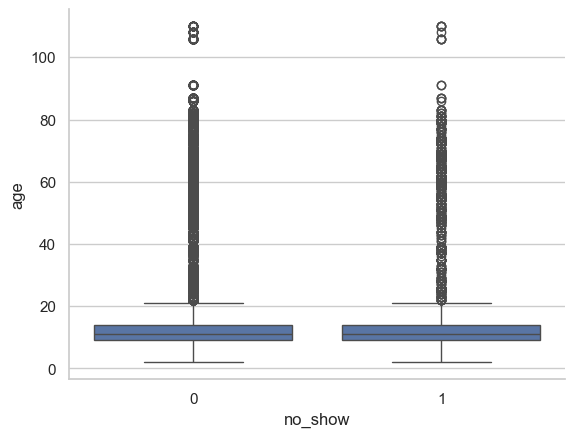

In [51]:
# Is there a significant correlation between a patient’s age and their likelihood of missing an appointment?
sns.boxplot(x='no_show', y='age', data=data)
sns.despine()

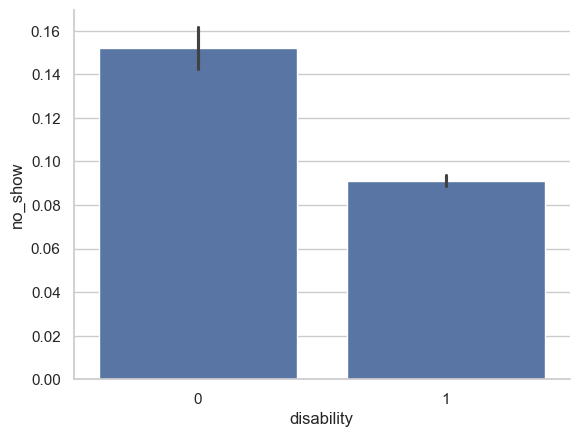

In [52]:
# Are patients with disabilities more likely to miss appointments?
sns.barplot(x='disability', y='no_show', data=data)
sns.despine()

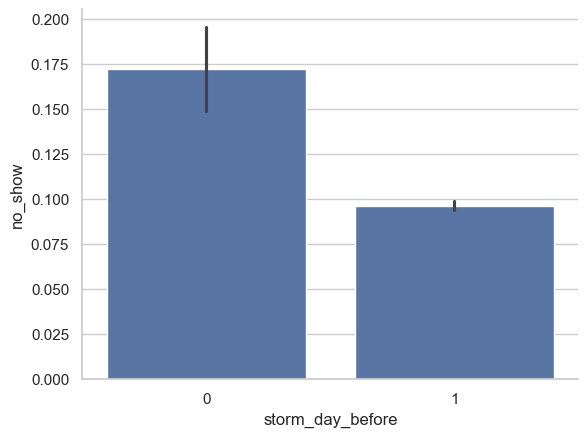

In [53]:
#  How do severe weather conditions (e.g., storms) impact appointment attendance?
sns.barplot(x='storm_day_before', y='no_show', data=data)
sns.despine()



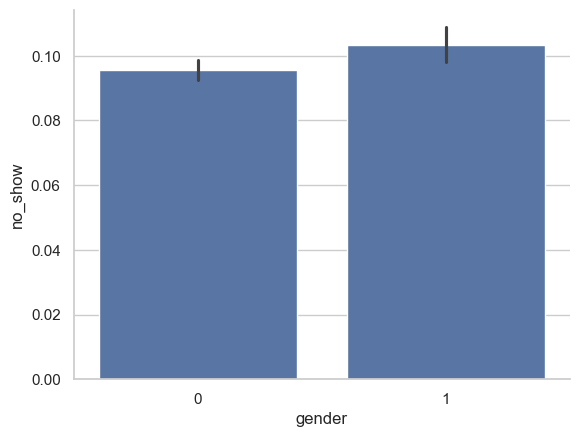

In [54]:
# Does the gender of a patient influence no-show likelihood?
sns.barplot(x='gender', y='no_show', data=data)
sns.despine()

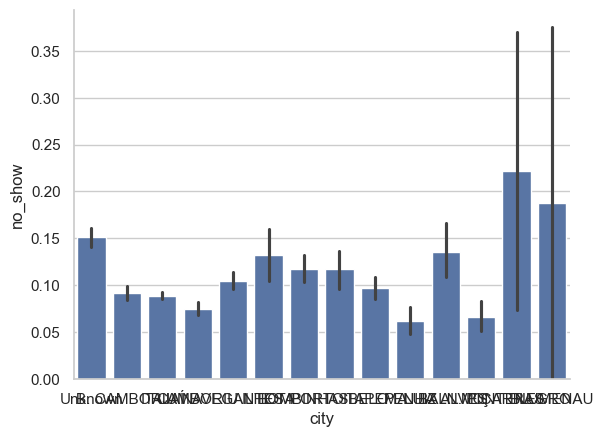

In [55]:
# Are patients from certain cities more prone to missing appointments?
sns.barplot(x='city', y='no_show', data=data)
sns.despine()

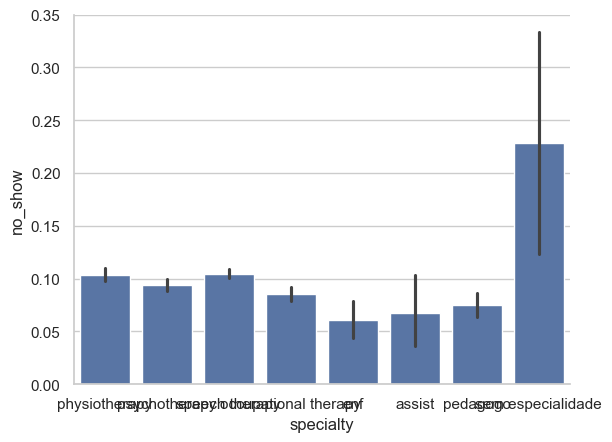

In [56]:
# How do different specialties (e.g., physical therapy vs. speech therapy) affect attendance rates?
sns.barplot(x='specialty', y='no_show', data=data)
sns.despine()


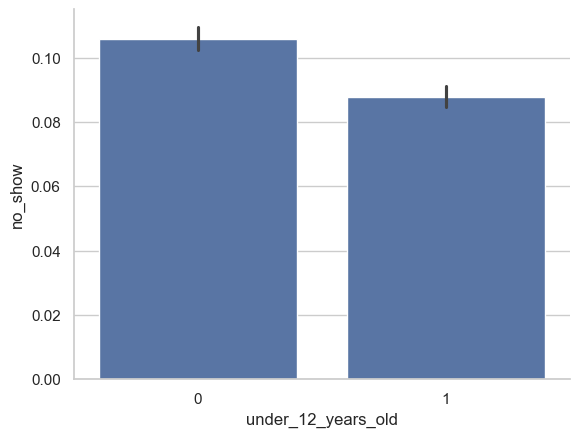

In [57]:
# Do patients attending their first appointment have a higher no-show rate compared to follow-ups?
# Assuming 'under_12_years_old' or similar indicator marks first appointments
sns.barplot(x='under_12_years_old', y='no_show', data=data)
sns.despine()


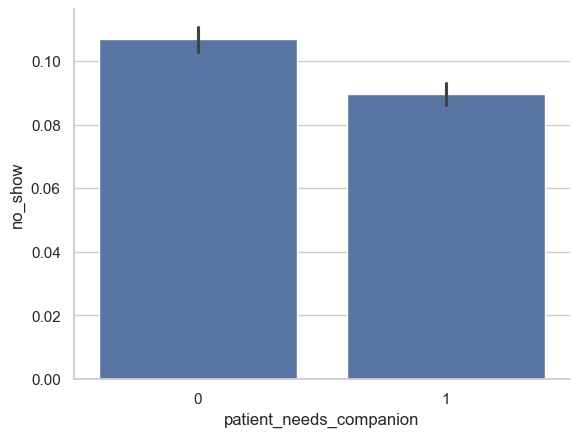

In [58]:
# Are patients who need a companion more likely to miss appointments?
sns.barplot(x='patient_needs_companion', y='no_show', data=data)
sns.despine()


## 3. Model Development

In [59]:
# Step 1: Data Splitting (Holdout Method)
from sklearn.model_selection import train_test_split

columns_to_drop = ['appointment_date', 'specialty', 'city', 'icd']  
# Drop the unnecessary columns
X = data.drop(columns=columns_to_drop + ['no_show'])
y = data['no_show']  # Target variable

# One-hot encoding
X = pd.get_dummies(X, drop_first=True) 

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Class distribution in y_train:\n", y_train.value_counts(normalize=True))
print("Class distribution in y_test:\n", y_test.value_counts(normalize=True))

# Verifying the shape of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


Class distribution in y_train:
 no_show
0    0.902578
1    0.097422
Name: proportion, dtype: float64
Class distribution in y_test:
 no_show
0    0.902541
1    0.097459
Name: proportion, dtype: float64
X_train shape: (34715, 24)
X_test shape: (14878, 24)


In [60]:
from imblearn.over_sampling import SMOTE
# step2: applying SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print("Class distribution in y_train_balanced:\n", y_train_balanced.value_counts(normalize=True))
print(f"X_train_balanced shape: {X_train_balanced.shape}")

Class distribution in y_train_balanced:
 no_show
0    0.5
1    0.5
Name: proportion, dtype: float64
X_train_balanced shape: (62666, 24)


In [61]:
# Step 3: Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# LogisticRegression
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_balanced, y_train_balanced)

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.59      0.71     13428
           1       0.11      0.48      0.18      1450

    accuracy                           0.58     14878
   macro avg       0.51      0.53      0.45     14878
weighted avg       0.83      0.58      0.66     14878

Confusion Matrix:
 [[7888 5540]
 [ 761  689]]
Accuracy Score: 0.576488775373034


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree - Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print(f"Decision Tree - Accuracy Score: {accuracy_score(y_test, y_pred_dt)}")


Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91     13428
           1       0.29      0.43      0.35      1450

    accuracy                           0.84     14878
   macro avg       0.61      0.66      0.63     14878
weighted avg       0.87      0.84      0.86     14878

Decision Tree - Confusion Matrix:
 [[11905  1523]
 [  826   624]]
Decision Tree - Accuracy Score: 0.8421158757897567


In [63]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(f"Random Forest - Accuracy Score: {accuracy_score(y_test, y_pred_rf)}")


Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     13428
           1       0.31      0.44      0.36      1450

    accuracy                           0.85     14878
   macro avg       0.62      0.67      0.64     14878
weighted avg       0.88      0.85      0.86     14878

Random Forest - Confusion Matrix:
 [[12020  1408]
 [  819   631]]
Random Forest - Accuracy Score: 0.8503159026750907


### 4. Model Evaluation

In [65]:
# Step 4: Model Evaluation
from sklearn.metrics import classification_report, roc_auc_score

# function to evaluate models and display metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for ROC-AUC

    print(f"--- Evaluation for {model_name} ---")
    print(classification_report(y_test, y_pred, target_names=["No-Show: No", "No-Show: Yes"]))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}\n")

# Evaluate each model using the function
evaluate_model(model, X_test, y_test, "Logistic Regression")
evaluate_model(dt_model, X_test, y_test, "Decision Tree")
evaluate_model(rf_model, X_test, y_test, "Random Forest")


--- Evaluation for Logistic Regression ---
              precision    recall  f1-score   support

 No-Show: No       0.91      0.59      0.71     13428
No-Show: Yes       0.11      0.48      0.18      1450

    accuracy                           0.58     14878
   macro avg       0.51      0.53      0.45     14878
weighted avg       0.83      0.58      0.66     14878

ROC-AUC Score: 0.5502

--- Evaluation for Decision Tree ---
              precision    recall  f1-score   support

 No-Show: No       0.94      0.89      0.91     13428
No-Show: Yes       0.29      0.43      0.35      1450

    accuracy                           0.84     14878
   macro avg       0.61      0.66      0.63     14878
weighted avg       0.87      0.84      0.86     14878

ROC-AUC Score: 0.7089

--- Evaluation for Random Forest ---
              precision    recall  f1-score   support

 No-Show: No       0.94      0.90      0.92     13428
No-Show: Yes       0.31      0.44      0.36      1450

    accuracy       

In [67]:
# cross-validation
# Cross-Validation
from sklearn.model_selection import cross_val_score
import numpy as np

def cross_validate_model(model, X, y, model_name):
    print(f"--- Cross-Validation for {model_name} ---")
    
    accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    roc_auc = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    precision = cross_val_score(model, X, y, cv=5, scoring='precision')
    recall = cross_val_score(model, X, y, cv=5, scoring='recall')
    f1 = cross_val_score(model, X, y, cv=5, scoring='f1')

    # Displaying the average scores
    print(f"Accuracy: {np.mean(accuracy):.4f}")
    print(f"ROC-AUC: {np.mean(roc_auc):.4f}")
    print(f"Precision: {np.mean(precision):.4f}")
    print(f"Recall: {np.mean(recall):.4f}")
    print(f"F1-Score: {np.mean(f1):.4f}\n")

# Performing cross-validation on each model
cross_validate_model(model, X_train_balanced, y_train_balanced, "Logistic Regression")
cross_validate_model(dt_model, X_train_balanced, y_train_balanced, "Decision Tree")
cross_validate_model(rf_model, X_train_balanced, y_train_balanced, "Random Forest")



--- Cross-Validation for Logistic Regression ---
Accuracy: 0.5957
ROC-AUC: 0.6278
Precision: 0.5954
Recall: 0.5968
F1-Score: 0.5958

--- Cross-Validation for Decision Tree ---
Accuracy: 0.8841
ROC-AUC: 0.9232
Precision: 0.8781
Recall: 0.8921
F1-Score: 0.8834

--- Cross-Validation for Random Forest ---
Accuracy: 0.9013
ROC-AUC: 0.9580
Precision: 0.8909
Recall: 0.9149
F1-Score: 0.9008



In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate

# Function to perform optimized cross-validation and retrieve metrics
def cross_validate_model_optimized(model, X, y, model_name):
    print(f"--- Cross-Validation for {model_name} ---")
    scoring = ['accuracy', 'roc_auc', 'precision', 'recall', 'f1']
    results = cross_validate(model, X, y, cv=5, scoring=scoring, n_jobs=-1)
    return {
        'Model': model_name,
        'Accuracy': np.mean(results['test_accuracy']),
        'ROC-AUC': np.mean(results['test_roc_auc']),
        'Precision': np.mean(results['test_precision']),
        'Recall': np.mean(results['test_recall']),
        'F1-Score': np.mean(results['test_f1'])
    }
    
# Performing cross-validation on each model
log_reg_results = cross_validate_model_optimized(model, X_train_balanced, y_train_balanced, "Logistic Regression")
dt_results = cross_validate_model_optimized(dt_model, X_train_balanced, y_train_balanced, "Decision Tree")
rf_results = cross_validate_model_optimized(rf_model, X_train_balanced, y_train_balanced, "Random Forest")

# Storing the results in a DataFrame
model_comparison_cv_optimized = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [log_reg_results['Accuracy'], dt_results['Accuracy'], rf_results['Accuracy']],
    'ROC-AUC': [log_reg_results['ROC-AUC'], dt_results['ROC-AUC'], rf_results['ROC-AUC']],
    'Precision': [log_reg_results['Precision'], dt_results['Precision'], rf_results['Precision']],
    'Recall': [log_reg_results['Recall'], dt_results['Recall'], rf_results['Recall']],
    'F1-Score': [log_reg_results['F1-Score'], dt_results['F1-Score'], rf_results['F1-Score']]
}
comparison_df_cv_optimized = pd.DataFrame(model_comparison_cv_optimized)

comparison_df_cv_optimized_melted = comparison_df_cv_optimized.melt(id_vars=["Model"], var_name="Metric", value_name="Score")


--- Cross-Validation for Logistic Regression ---
--- Cross-Validation for Decision Tree ---
--- Cross-Validation for Random Forest ---


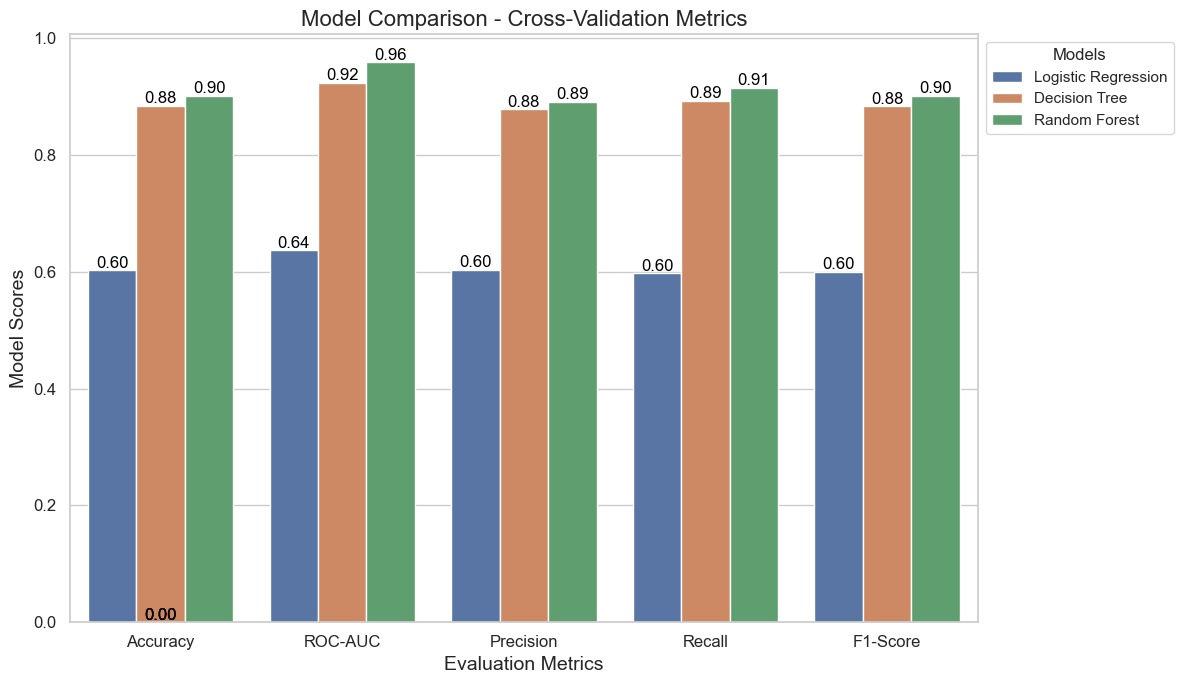

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Creating the bar plot for model comparison
bar_plot = sns.barplot(x="Metric", y="Score", hue="Model", data=comparison_df_cv_optimized_melted)
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      fontsize=12, color='black', 
                      xytext=(0, 5), textcoords='offset points')
plt.legend(title="Models", loc='upper left', bbox_to_anchor=(1, 1))

# Adding titles and labels with consistent font sizes
plt.title("Model Comparison - Cross-Validation Metrics", fontsize=16)
plt.xlabel("Evaluation Metrics", fontsize=14)
plt.ylabel("Model Scores", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Inference based on the model comparion:
- Random Forest is the best model, leading in accuracy (0.90), ROC-AUC (0.96), recall (0.92), and F1-score (0.90).
- Decision Tree performs well, especially in recall (0.92), but slightly lags behind in accuracy (0.88).
- Logistic Regression performs poorly with low accuracy (0.60) and ROC-AUC (0.64), making it less suitable for this dataset.
  
### Conclusion: 
- Random Forest is the top performer, followed by Decision Tree, while Logistic Regression underperforms.